# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
# Let's define the dataframe with the information of table above
student_data = pd.DataFrame({'StudentID': range(1,11), \
                             'Age': [17,51,27,21,36,48,19,26,54,30], \
                             'Tardies': [10,1,5,9,4,2,9,6,0,3]})

# Let's display the dataframe created
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

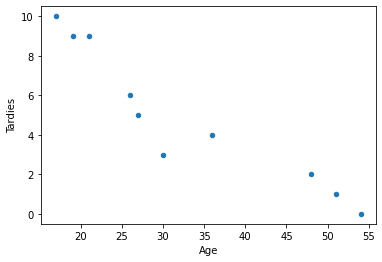

In [4]:
# Your code here.
student_data[['Age', 'Tardies']].plot(x = 'Age', y= 'Tardies', kind= 'scatter');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 
# Looking at data, it seems that the younger the students are, the more often they are late to class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
#correlation:
print('The correlation is ', str(student_data[['Age', 'Tardies']].corr(method= 'pearson').iloc[0,1]))

#covariance:
print('The covariance is ', str(student_data[['Age', 'Tardies']].cov().iloc[0,1]))

# Both correlation and covariance are negative numbers. So, the age and the number of late arrivals vary inversely, i.e. when
# one variable increases, the other decreases and vice-versa. The module of correlation is around 0.9. It implies that the 
# relation between age and tardies is strongly linear and inverse.

The correlation is  -0.9391626886887121
The covariance is  -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.
# independent variable (Age)
X = student_data['Age']

# dependent variable (Tardies)
Y = student_data['Tardies']

# regression model parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))
print ('The Pearson correlation coefficient is: ' + str(r_value))
print ('The coefficient of determination is: ' + str(r_value**2))

# The outcome variables are the slope, the intercept, the Pearson correlation coefficient, the p-value (for a hypothesis 
# test whose null hypothesis is that the slope is zero, using Wald Test with t-distribution of the test statistic), the 
# standard error of the estimated slope (gradient). The last output is computed under the assumption of residual normality.
# The regression being used is the linear (least-squares) regression.

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768
The Pearson correlation coefficient is: -0.9391626886887121
The coefficient of determination is: 0.8820265558250108


Plot your regression model on your scatter plot.

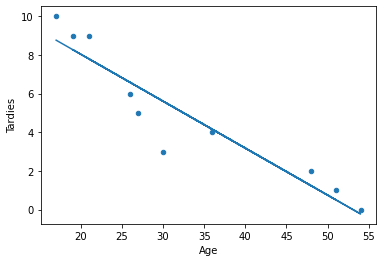

In [8]:
# Your code here.
# Scatter plot
student_data[['Age', 'Tardies']].plot(x = 'Age', y= 'Tardies', kind= 'scatter')

# regression line
plt.plot(X, intercept + slope*X);

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
# The age seems to be a good predictor of tardiness. They vary inversely, the increase of age is related to a decrease in 
# the number of times that that student arrives late. The regression line seems to be near to the most of the points. Actually,
# the coefficient of determination is around 88 %, which means that 88 % of the variation of dependent variable (tardiness)
# is predicted by the independent variable (age).

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import the data
data = pd.read_csv('vehicles.csv')

# Let's check the first five rows
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# Your response here.
# Pearson correlation
print('Pearson:\n', data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].\
corr(method= 'pearson')['CO2 Emission Grams/Mile'].sort_values(ascending= False)[1:])
print('\n')

# Spearman correlation
print('Spearman:\n', data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].\
corr(method= 'spearman')['CO2 Emission Grams/Mile'].sort_values(ascending= False)[1:])
print('\n')

# ^KEndall correlation
print('Kendall:\n', data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].\
corr(method= 'kendall')['CO2 Emission Grams/Mile'].sort_values(ascending= False)[1:])

# I think the variable will be the most important in determining CO2 emissions is "Fuel Barrels/Year", because it is the one
# with the highest correlation coefficient (in absolute value). The variable which provides the least information for 
# determining CO2 emissions is "Year", because it has the lowest correlation factor (in absolute value).

Pearson:
 Fuel Barrels/Year    0.986189
Fuel Cost/Year       0.930865
Cylinders            0.752393
Year                -0.222300
Combined MPG        -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64


Spearman:
 Fuel Barrels/Year    0.995539
Fuel Cost/Year       0.922723
Cylinders            0.788777
Year                -0.215108
Combined MPG        -0.995258
Name: CO2 Emission Grams/Mile, dtype: float64


Kendall:
 Fuel Barrels/Year    0.987864
Fuel Cost/Year       0.814330
Cylinders            0.662733
Year                -0.151399
Combined MPG        -0.977930
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.
# Independent variables
X = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]

# dependent variable
Y = data[['CO2 Emission Grams/Mile']]

# Let's add the array of ones (constant) typical from OLS
X = sm.add_constant(X)

# Let's get the OLS
model = sm.OLS(Y,X)
results = model.fit()

# The regression used is a linear regression (Ordinary Least Squares), because with the exception of 'combined MPG' 
# there are similar values between Pearson and Spearman correlation factors. From this fact, it is assumed that all variables 
# have a linear relation with the outcome, except 'combined MPG'.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# Your response here. 
results.summary()
# The most important variables (sorted descendingly) in the model are 'Fuel Barrels/Year', 'Combined MPG', 'Cylinders'. 
# It is like this, because of the absolute value of their coefficients (column 'coef'). The model has a R-squared of 0.981, 
# which means that 98.1 % of the variance of dependent variable can be explained by the independent variables. It allows us to
# understand that, for example, an increment of 1 unit of 'Fuel Barrels/Year', increases the dependent variable by  19, if all
# the other remain constant. A similar rationale can be perfomed for all other independent variables. Having said that, it
# seems there are some problems with the model as indicated by the condition number. Maybe removing the variables 'Year'
# and 'Fuel Cost/Year', could improve the model relatively to the problems.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                             19:48:59   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here.
# Let's define the dataframe with the data described above
df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

# Let's display the dataframe
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

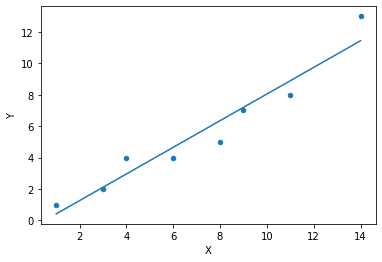

In [15]:
# Your code here.
# Scatter plot
df.plot(x= 'X', y= 'Y', kind= 'scatter')

# regression model parameters
slope, intercept, r_value, p_value, std_err = stats.linregress(df['X'], df['Y'])

# regression line
plt.plot(df['X'], intercept + slope * df['X']);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [16]:
# Your response here.
print('It seems there is a linear relationship between the variables  X and Y.')
print ('The slope of linear relationship is: ' + str(slope))
print ('The intercept of linear relationship is: ' + str(intercept))
print ('The Pearson correlation coefficient of linear relationship is: ' + str(r_value))
print ('The coefficient of determination of linear relationship is: ' + str(r_value**2))

It seems there is a linear relationship between the variables  X and Y.
The slope of linear relationship is: 0.8484848484848485
The intercept of linear relationship is: -0.43939393939393945
The Pearson correlation coefficient of linear relationship is: 0.9652303546573691
The coefficient of determination of linear relationship is: 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

The problematic points seem to be the third, fifth and eighth of original set.
The slope of linear relationship is: 0.7352941176470588
The intercept of linear relationship is: -0.011764705882352011
The Pearson correlation coefficient of linear relationship is: 0.9941320562302279
The coefficient of determination of linear relationship is: 0.9882985452245411


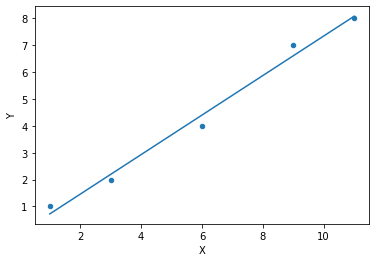

In [37]:
# Your response here
# Let's store the differences between the dependent variable and regression line 
dif = df['Y']-(intercept + slope * df['X'])

# Let's select just the rows where the difference is above 1 
dif[abs(dif) > 1].index
print('The problematic points seem to be the third, fifth and eighth of original set.')
# Now let's drop these rows
df= df.drop(dif[abs(dif) > 1].index)

# Scatter plot without problematic points
df.plot(x= 'X', y= 'Y', kind= 'scatter')

# regression model parameters without problematic points
slope, intercept, r_value, p_value, std_err = stats.linregress(df['X'], df['Y'])

# regression linewithout problematic points
plt.plot(df['X'], intercept + slope * df['X'])

print ('The slope of linear relationship is: ' + str(slope))
print ('The intercept of linear relationship is: ' + str(intercept))
print ('The Pearson correlation coefficient of linear relationship is: ' + str(r_value))
print ('The coefficient of determination of linear relationship is: ' + str(r_value**2))

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [18]:
# Your response here. 
# After removing the problematic points, either the slope eithe to intercept either the Pearson correlation factor or the
# coefficient of determination changed. The slope reduced from 0.85 to 0.74 and the intercept increases from -0.44 to around
# 0. Now, the correlation (Pearson) coefficient e near to 1 instead of 0.97 as previously and the coeffcient of determination
# increased from 0.93 to 0.99. The amount of variance in Y is virtually explained totally by X.